## Test perfomance

### Requirements

In [8]:
from __crc import CRC
import random as _random
import matplotlib.pyplot as _plt
import typing as _typing
import numpy as _numpy

#### **CRC** (Cyclic Redundancy Check) analizing

##### Helping functions for **CRC**

In [9]:
def to_bits(message: str) -> str:
	"""
	Convert text message to bits
	"""
	return ''.join(format(ord(i), '08b') for i in message)

def count_differ_bits(str1: str, str2: str) -> int:
    """
    Count differ bits
    """
    return sum(s1 != s2 for s1, s2 in zip(str1, str2))

def get_encoded_message(bits_message: str, divisior: str) -> str:
    """
    Encoding message using CRC
    """
    return CRC(bits_message, divisior)._encode_data()[0]

def generalize_encoding_messages(bits_message: str, divisiors: _typing.List[str]) -> _typing.List[str]:
    """
    Generalize a messages
    """
    return [CRC(bits_message, divisior)._encode_data()[0] for divisior in divisiors]

def channel_simulation(message: str, probs: _typing.List[float]) -> _typing.List[str]:
    """
    Transmitting message simulation
    """
    modified_messages = []
    for probability in probs:
        modified_message = ''
        for bit in message:
            if _random.random() < probability:
                modified_message += str(1 - int(bit))
            else:
                modified_message += bit
        modified_messages.append(modified_message)
    return modified_messages

#### Define:
- possible **divisiors**
- **probability**
- **text** message
#### Find:
- **bits** message
- **encoded** message
- **modified** message
- **differ bits** in message

In [10]:
possible_five_divisiors_bits_combinations = ['000', '001', '010', '011', '100', '101', '110', '111']
probability = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
text_message = 'hello'
bits_message = to_bits(text_message)
# print(bits_message)

# Encodding process
encoded_messages = generalize_encoding_messages(bits_message, possible_five_divisiors_bits_combinations) # Encoded messages
# print(encoded_messages)

# Modified process
modified_messages = [channel_simulation(encoded_messages[i], probability) for i in range(len(encoded_messages))]
# print(modified_messages)

# Find differ bits
differ_bits = [[count_differ_bits(j, encoded_messages[a]) for i, j in enumerate(b)] for a, b in enumerate(modified_messages)]

In [11]:
def plot_8_subplots(num_of_differ_bits: _typing.List[_typing.List[int]], probability: _typing.List[float]) -> None:
    """
    Plotting results for differ divisiors
    """
    fig, axs = _plt.subplots(2, 4)
    fig.set_size_inches(40, 20)
    _plt.suptitle('Cyclic Redundancy Check perfomance', fontsize=30, fontweight='bold')

    axs[0, 0].plot(probability, num_of_differ_bits[0], '#FF5733', label="(D.P.) -> sorted array", marker="o")
    axs[0, 0].tick_params(axis='both', labelsize=20)
    axs[0, 0].set_xlabel('Channel Error Probability', fontsize=22)
    axs[0, 0].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[0, 0].grid(True)
    axs[0, 0].set_title('Perfomance of 0 0 0 (CRC divisior) ', fontsize=26, fontweight='semibold')

    axs[0, 1].plot(probability, num_of_differ_bits[1], '#070302', label="(D.P.) -> sorted array", marker="o")
    axs[0, 1].tick_params(axis='both', labelsize=20)
    axs[0, 1].set_xlabel('Channel Error Probability', fontsize=22)
    axs[0, 1].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[0, 1].grid(True)
    axs[0, 1].set_title('Perfomance of 0 0 1 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[0, 2].plot(probability, num_of_differ_bits[2], '#CBE51C', label="(D.P.) -> sorted array", marker="o")
    axs[0, 2].tick_params(axis='both', labelsize=20)
    axs[0, 2].set_xlabel('Channel Error Probability', fontsize=22)
    axs[0, 2].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[0, 2].grid(True)
    axs[0, 2].set_title('Perfomance of 0 1 0 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[0, 3].plot(probability, num_of_differ_bits[3], '#0F7F72', label="(D.P.) -> sorted array", marker="o")
    axs[0, 3].tick_params(axis='both', labelsize=20)
    axs[0, 3].set_xlabel('Channel Error Probability', fontsize=22)
    axs[0, 3].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[0, 3].grid(True)
    axs[0, 3].set_title('Perfomance of 0 1 1 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[1, 0].plot(probability, num_of_differ_bits[4], '#205B7C', label="(D.P.) -> sorted array", marker="o")
    axs[1, 0].tick_params(axis='both', labelsize=20)
    axs[1, 0].set_xlabel('Channel Error Probability', fontsize=22)
    axs[1, 0].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[1, 0].grid(True)
    axs[1, 0].set_title('Perfomance of 1 0 0 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[1, 1].plot(probability, num_of_differ_bits[5], '#0F9CEB', label="(D.P.) -> sorted array", marker="o")
    axs[1, 1].tick_params(axis='both', labelsize=20)
    axs[1, 1].set_xlabel('Channel Error Probability', fontsize=22)
    axs[1, 1].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[1, 1].grid(True)
    axs[1, 1].set_title('Perfomance of 1 0 1 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[1, 2].plot(probability, num_of_differ_bits[6], '#FF006E', label="(D.P.) -> sorted array", marker="o")
    axs[1, 2].tick_params(axis='both', labelsize=20)
    axs[1, 2].set_xlabel('Channel Error Probability', fontsize=22)
    axs[1, 2].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[1, 2].grid(True)
    axs[1, 2].set_title('Perfomance of 1 1 0 (CRC divisior)', fontsize=26, fontweight='semibold')

    axs[1, 3].plot(probability, num_of_differ_bits[7], '#E80707', label="(D.P.) -> sorted array", marker="o")
    axs[1, 3].tick_params(axis='both', labelsize=20)
    axs[1, 3].set_xlabel('Channel Error Probability', fontsize=22)
    axs[1, 3].set_ylabel('Number of Undetecded Erroneous Frame', fontsize=22)
    axs[1, 3].grid(True)
    axs[1, 3].set_title('Perfomance of 1 1 1 (CRC divisior)', fontsize=26, fontweight='semibold')

    _plt.show()

#### Call **plot_8_subplots()** function

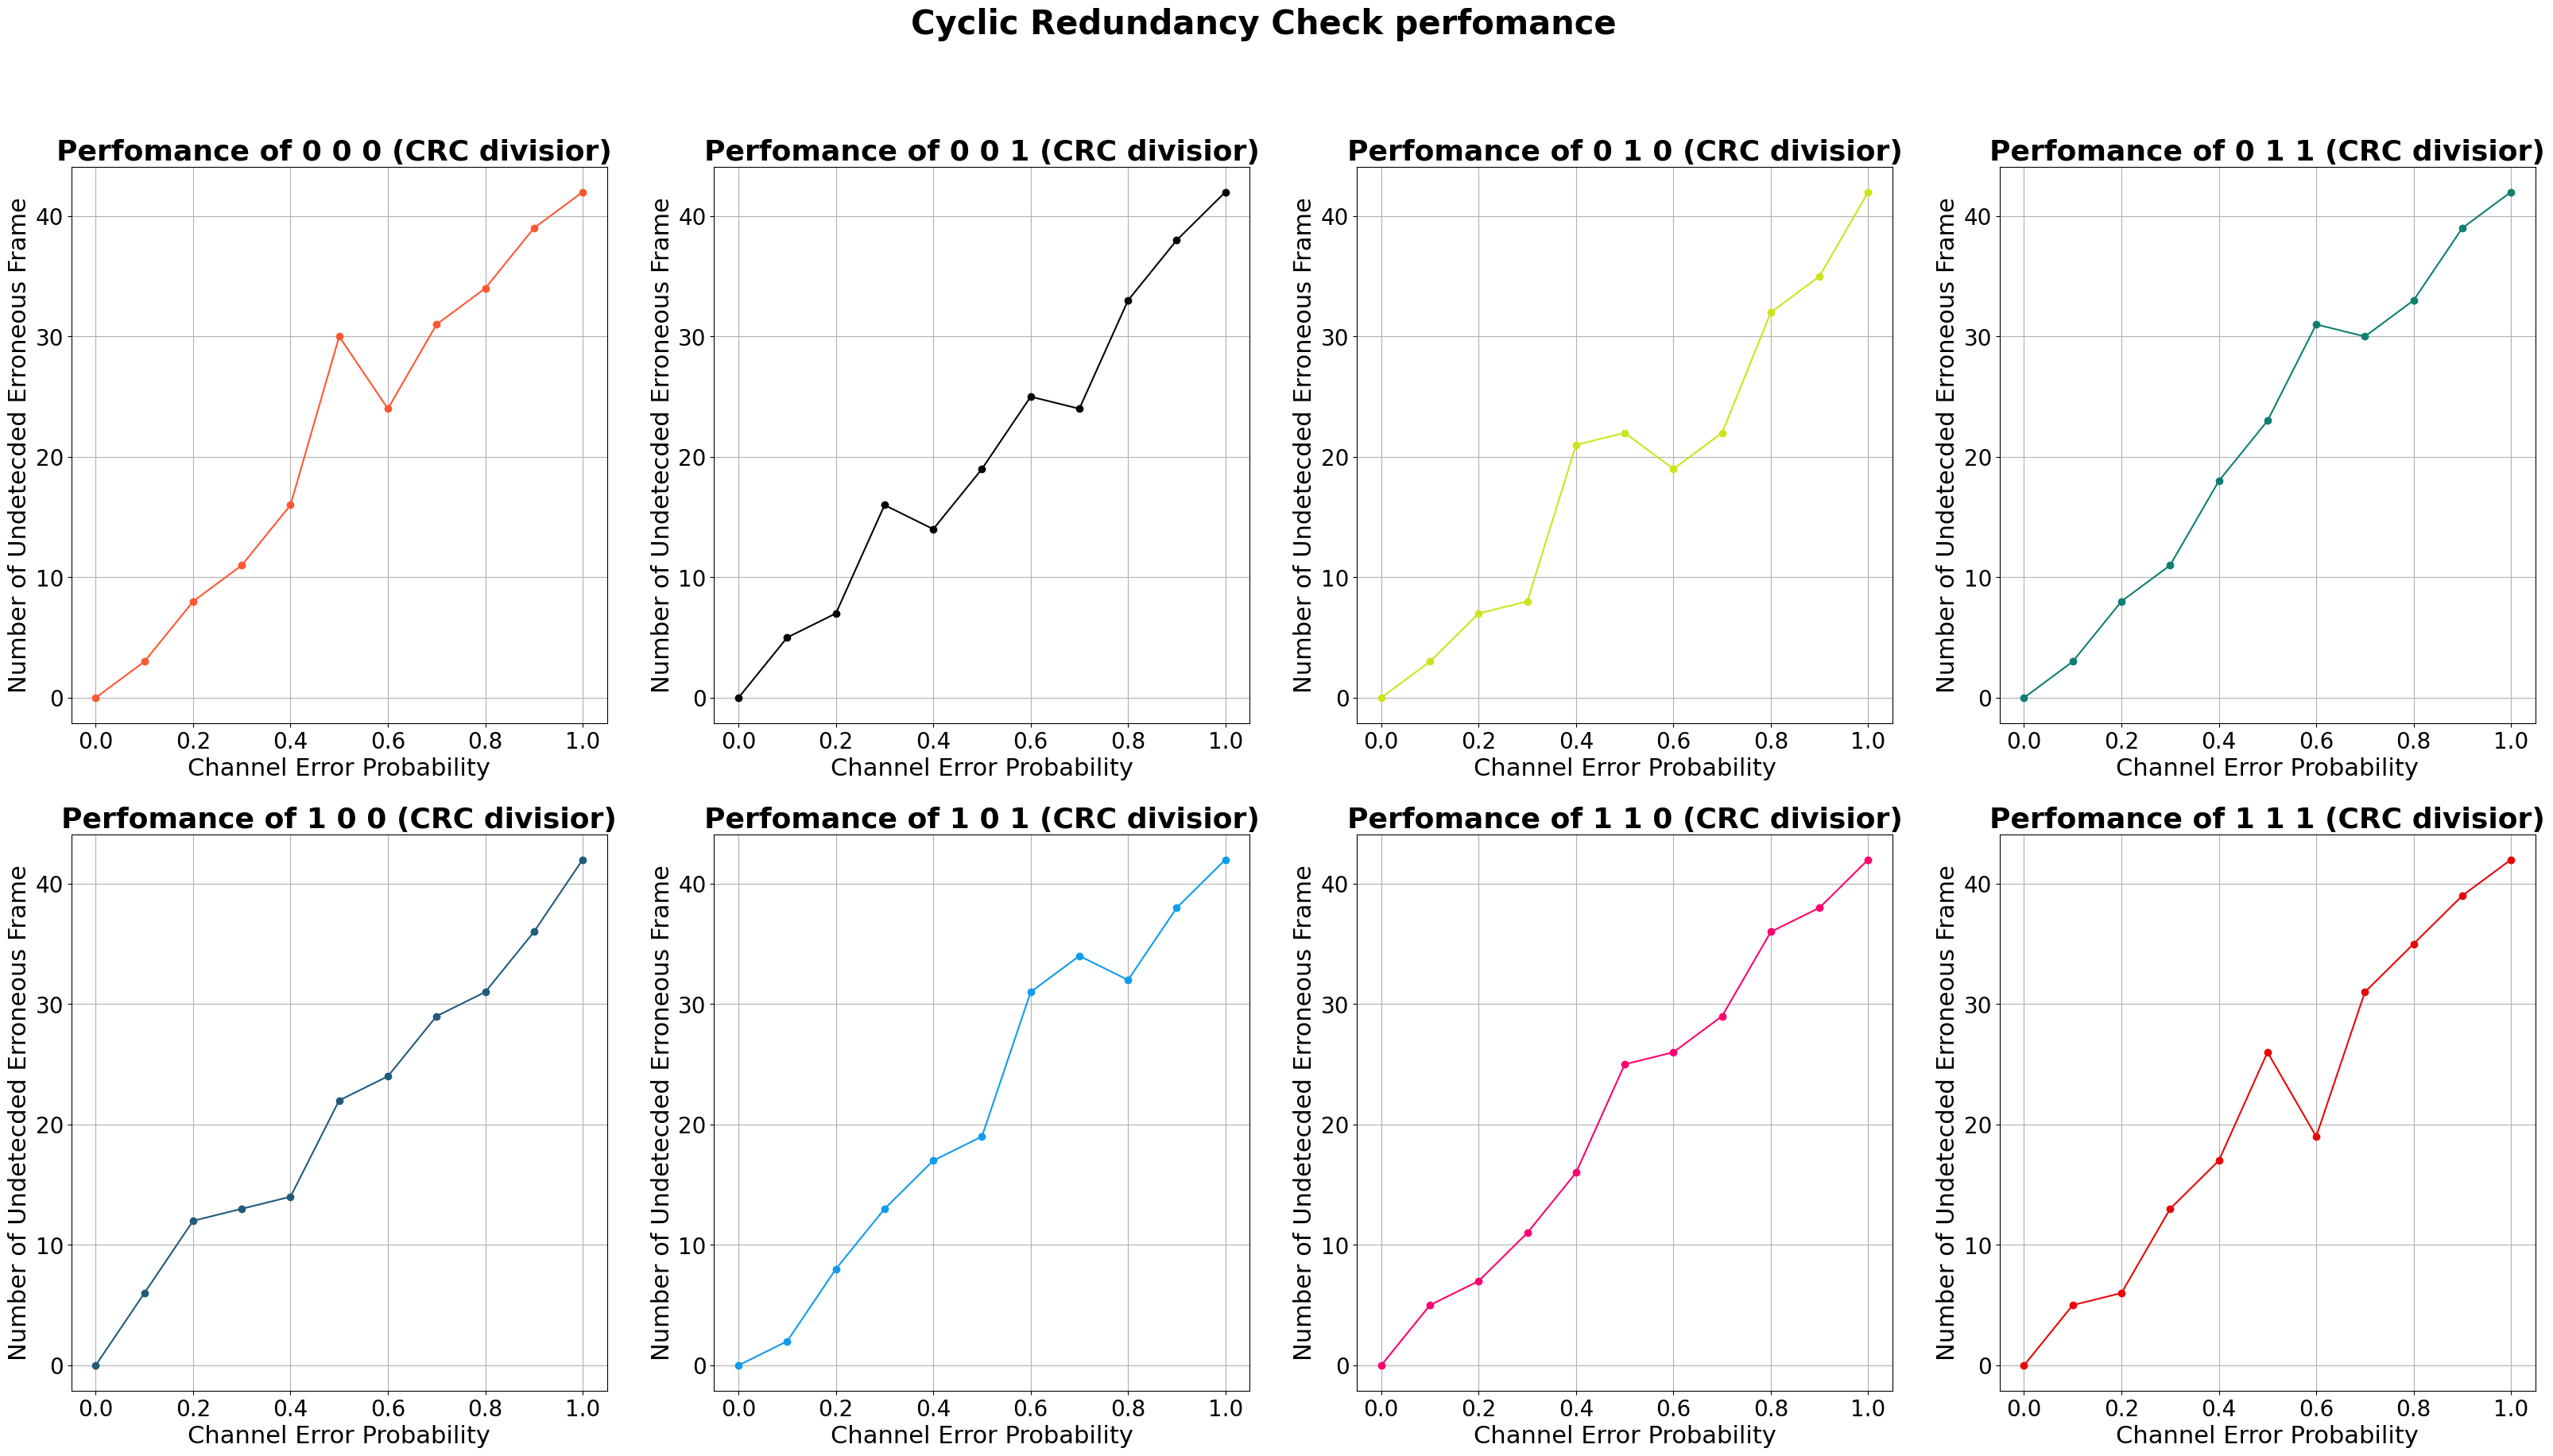

In [12]:
plot_8_subplots(differ_bits, probability)

In [50]:
def plot_comparative(num_of_differ_bits: _typing.List[_typing.List[int]], probability: _typing.List[float]) -> None:
    """
    Plotting comparative
    """
    fig, ax = _plt.subplots()
    ax.plot(probability, num_of_differ_bits[0], label="Plot 1 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[1], label="Plot 2 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[2], label="Plot 3 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[3], label="Plot 4 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[4], label="Plot 5 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[5], label="Plot 6 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[6], label="Plot 7 (D.P.) -> sorted array")
    ax.plot(probability, num_of_differ_bits[7], label="Plot 8 (D.P.) -> sorted array")

    ax.set_xlabel('Channel Error Probability', fontsize=10)
    ax.set_ylabel('Number of Undetecded Erroneous Frame', fontsize=10)
    ax.set_title('Perfomance of differ CRC divisiors', fontsize=15, fontweight='semibold')

    _plt.grid()
    _plt.show()

#### Call **plot_comparative()** function

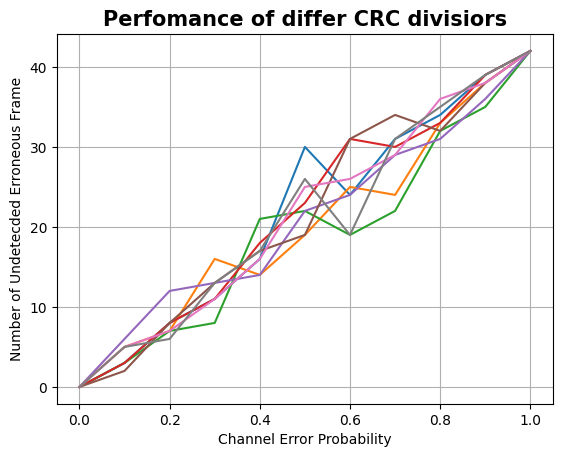

In [51]:
plot_comparative(differ_bits, probability)